In [102]:
import sqlite3
import numpy as np
import pandas as pd
# from sql import run
# run.prettytable.__dict__.setdefault('DEFAULT',run.prettytable.DEFAULT)
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from category_encoders import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.utils.validation import check_is_fitted
from collections import Counter
from sklearn.preprocessing import StandardScaler

In [40]:
conn = sqlite3.connect("C:\\Users\\User\\Downloads\\nepal_eq.db")

In [6]:
tables = pd.read_sql("SELECT name FROM sqlite_master WHERE type='table';", conn)
print(tables)

                     name
0         building_damage
1      building_structure
2  household_demographics
3                  id_map


In [7]:
df = pd.read_sql('select * from building_damage',conn)
df.head()

,area_assesed,building_id,damage_overall_collapse,damage_overall_leaning,damage_overall_adjacent_building_risk,damage_foundation_severe,damage_foundation_moderate,damage_foundation_insignificant,damage_roof_severe,damage_roof_moderate,...,has_damage_parapet,has_damage_cladding_glazing,has_geotechnical_risk,has_geotechnical_risk_land_settlement,has_geotechnical_risk_fault_crack,has_geotechnical_risk_liquefaction,has_geotechnical_risk_landslide,has_geotechnical_risk_rock_fall,has_geotechnical_risk_flood,has_geotechnical_risk_other
0,Both,1.201010e+11,Moderate-Heavy,Insignificant/light,None,None,Moderate-Heavy-(<1/3),Insignificant/light-(<1/3),Severe-Extreme-(<1/3),None,...,0.0,0.0,0.0,0,0,0,0,0,0,0
1,Exterior,1.201010e+11,Severe-Extreme,Severe-Extreme,Insignificant/light,Severe-Extreme-(>2/3),None,None,Severe-Extreme-(>2/3),None,...,0.0,0.0,0.0,0,0,0,0,0,0,0
2,Both,1.201010e+11,Moderate-Heavy,Moderate-Heavy,Moderate-Heavy,None,Moderate-Heavy-(>2/3),None,None,Moderate-Heavy-(>2/3),...,0.0,0.0,0.0,0,0,0,0,0,0,0
3,Both,1.201010e+11,Moderate-Heavy,Moderate-Heavy,Moderate-Heavy,None,Moderate-Heavy-(>2/3),None,None,Moderate-Heavy-(>2/3),...,0.0,0.0,0.0,0,0,0,0,0,0,0
4,Exterior,1.201010e+11,Insignificant/light,None,None,None,None,Insignificant/light-(<1/3),None,None,...,0.0,0.0,0.0,0,0,0,0,0,0,0


In [8]:
conn.close()

In [9]:
df.shape

(762106, 77)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 762106 entries, 0 to 762105
Data columns (total 77 columns):
 #   Column                                                Non-Null Count   Dtype  
---  ------                                                --------------   -----  
 0   area_assesed                                          762094 non-null  object 
 1   building_id                                           762106 non-null  float64
 2   damage_overall_collapse                               428934 non-null  object 
 3   damage_overall_leaning                                270616 non-null  object 
 4   damage_overall_adjacent_building_risk                 105527 non-null  object 
 5   damage_foundation_severe                              53631 non-null   object 
 6   damage_foundation_moderate                            103606 non-null  object 
 7   damage_foundation_insignificant                       174902 non-null  object 
 8   damage_roof_severe                          

In [12]:
%load_ext sql

The sql extension is already loaded. To reload it, use:
  %reload_ext sql


In [13]:
%sql sqlite:///C:/Users/User/Downloads/nepal_eq.db

In [14]:
%%sql
select * from sqlite_schema

 * sqlite:///C:/Users/User/Downloads/nepal_eq.db
Done.


[('table', 'building_damage', 'building_damage', 24282, 'CREATE TABLE "building_damage" (\n\t"area_assesed"\tTEXT,\n\t"building_id"\tREAL,\n\t"damage_overall_collapse"\tTEXT,\n\t"damage_overall_leaning"\tTE ... (3025 characters truncated) ... ide"\tINTEGER,\n\t"has_geotechnical_risk_rock_fall"\tINTEGER,\n\t"has_geotechnical_risk_flood"\tINTEGER,\n\t"has_geotechnical_risk_other"\tINTEGER\n)'),
 ('table', 'building_structure', 'building_structure', 78109, 'CREATE TABLE "building_structure" (\n\t"age_building"\tINTEGER,\n\t"building_id"\tREAL,\n\t"condition_post_eq"\tTEXT,\n\t"count_floors_post_eq"\tINTE ... (213 characters truncated) ... _type"\tTEXT,\n\t"plan_configuration"\tTEXT,\n\t"plinth_area_sq_ft"\tINTEGER,\n\t"position"\tTEXT,\n\t"roof_type"\tTEXT,\n\t"superstructure"\tTEXT\n)'),
 ('table', 'household_demographics', 'household_demographics', 109183, 'CREATE TABLE "household_demographics" (\n\t"household_id"\tREAL,\n\t"gender_household_head"\tTEXT,\n\t"age_household_head"\tREAL,\n\t"caste_household ... (15 characters truncated) ... ucation_level_household_head"\tTEXT,\n\t"income_level_household"\tTEXT,\n\t"size_household"\tREAL,\n\t"is_bank_account_present_in_household"\tREAL\n)'),
 ('table', 'id_map', 'id_map', 3, 'CREATE TABLE "id_map" (\n\t"building_id"\tREAL,\n\t"district_id"\tINTEGER,\n\t"vdcmun_id"\tINTEGER,\n\t"household_id"\tTEXT\n)')]

In [15]:
%%sql
select name from sqlite_schema

 * sqlite:///C:/Users/User/Downloads/nepal_eq.db
Done.


name
building_damage
building_structure
household_demographics
id_map


In [16]:
%%sql
select * from id_map
limit 5

 * sqlite:///C:/Users/User/Downloads/nepal_eq.db
Done.


building_id,district_id,vdcmun_id,household_id
120101000011.0,12,1207,12010100001101.0
120101000021.0,12,1207,12010100002101.0
120101000031.0,12,1207,12010100003101.0
120101000041.0,12,1207,12010100004101.0
120101000051.0,12,1207,12010100005101.0


In [17]:
%%sql
select count(building_id) from id_map

 * sqlite:///C:/Users/User/Downloads/nepal_eq.db
Done.


count(building_id)
818786


In [18]:
%%sql
select distinct(district_id) from id_map

 * sqlite:///C:/Users/User/Downloads/nepal_eq.db
Done.


district_id
12
20
21
22
23
24
28
29
30
31


In [19]:
%%sql
select count(distinct(building_id))from id_map

 * sqlite:///C:/Users/User/Downloads/nepal_eq.db
Done.


count(distinct(building_id))
762106


In [21]:
%%sql 
select count(distinct(building_id)) as 'No_of_building in district 36'from id_map
where district_id = 36

 * sqlite:///C:/Users/User/Downloads/nepal_eq.db
Done.


No_of_building in district 36
78074


In [22]:
%%sql
select * from building_structure
limit 5

 * sqlite:///C:/Users/User/Downloads/nepal_eq.db
Done.


age_building,building_id,condition_post_eq,count_floors_post_eq,count_floors_pre_eq,foundation_type,ground_floor_type,height_ft_post_eq,height_ft_pre_eq,land_surface_condition,other_floor_type,plan_configuration,plinth_area_sq_ft,position,roof_type,superstructure
9,120101000011.0,Damaged-Used in risk,1,1,Other,Mud,9,9,Flat,Not applicable,Rectangular,288,Not attached,Bamboo/Timber-Light roof,mud_mortar_stone
15,120101000021.0,Damaged-Repaired and used,1,1,Other,Mud,9,9,Flat,Not applicable,Rectangular,364,Not attached,Bamboo/Timber-Light roof,mud_mortar_stone
20,120101000031.0,Damaged-Repaired and used,1,1,Other,Mud,9,9,Flat,Not applicable,Rectangular,384,Not attached,Bamboo/Timber-Light roof,mud_mortar_stone
20,120101000041.0,Damaged-Repaired and used,1,1,Other,Mud,9,9,Flat,Not applicable,Rectangular,312,Not attached,Bamboo/Timber-Light roof,mud_mortar_stone
30,120101000051.0,Damaged-Repaired and used,1,1,Other,Mud,9,9,Flat,Not applicable,Rectangular,308,Not attached,Bamboo/Timber-Light roof,mud_mortar_stone


In [26]:
%%sql
select * from building_structure b
join id_map i on b.building_id = i.building_id
where district_id = 36
limit 5

 * sqlite:///C:/Users/User/Downloads/nepal_eq.db
Done.


age_building,building_id,condition_post_eq,count_floors_post_eq,count_floors_pre_eq,foundation_type,ground_floor_type,height_ft_post_eq,height_ft_pre_eq,land_surface_condition,other_floor_type,plan_configuration,plinth_area_sq_ft,position,roof_type,superstructure,building_id_1,district_id,vdcmun_id,household_id
4,360106001171.0,Damaged-Rubble unclear,0,2,Mud mortar-Stone/Brick,Mud,0,18,Flat,TImber/Bamboo-Mud,Rectangular,280,Not attached,Bamboo/Timber-Light roof,mud_mortar_stone,360106001171.0,36,3609,None
15,360106001181.0,Damaged-Rubble unclear,0,1,Mud mortar-Stone/Brick,Mud,0,18,Flat,Not applicable,Rectangular,120,Attached-1 side,Bamboo/Timber-Light roof,mud_mortar_stone,360106001181.0,36,3609,36010600118101.0
25,360107000161.0,Damaged-Rubble unclear,0,2,Mud mortar-Stone/Brick,Mud,0,14,Flat,TImber/Bamboo-Mud,Rectangular,300,Not attached,Bamboo/Timber-Light roof,mud_mortar_stone,360107000161.0,36,3609,36010700016101.0
22,360107000381.0,Damaged-Rubble clear,0,2,Mud mortar-Stone/Brick,Mud,0,16,Flat,TImber/Bamboo-Mud,Rectangular,155,Not attached,Bamboo/Timber-Light roof,mud_mortar_stone,360107000381.0,36,3609,36010700038101.0
20,360202000691.0,Damaged-Rubble unclear,0,2,Mud mortar-Stone/Brick,Brick/Stone,0,14,Flat,TImber/Bamboo-Mud,Rectangular,240,Attached-1 side,Bamboo/Timber-Heavy roof,mud_mortar_stone,360202000691.0,36,3601,None


In [33]:
%%sql
select distinct(i.building_id), b.* from id_map i
join building_structure b on b.building_id = i.building_id
where i.district_id = 36
limit 5

 * sqlite:///C:/Users/User/Downloads/nepal_eq.db
Done.


building_id,age_building,building_id_1,condition_post_eq,count_floors_post_eq,count_floors_pre_eq,foundation_type,ground_floor_type,height_ft_post_eq,height_ft_pre_eq,land_surface_condition,other_floor_type,plan_configuration,plinth_area_sq_ft,position,roof_type,superstructure
360106001171.0,4,360106001171.0,Damaged-Rubble unclear,0,2,Mud mortar-Stone/Brick,Mud,0,18,Flat,TImber/Bamboo-Mud,Rectangular,280,Not attached,Bamboo/Timber-Light roof,mud_mortar_stone
360106001181.0,15,360106001181.0,Damaged-Rubble unclear,0,1,Mud mortar-Stone/Brick,Mud,0,18,Flat,Not applicable,Rectangular,120,Attached-1 side,Bamboo/Timber-Light roof,mud_mortar_stone
360107000161.0,25,360107000161.0,Damaged-Rubble unclear,0,2,Mud mortar-Stone/Brick,Mud,0,14,Flat,TImber/Bamboo-Mud,Rectangular,300,Not attached,Bamboo/Timber-Light roof,mud_mortar_stone
360107000381.0,22,360107000381.0,Damaged-Rubble clear,0,2,Mud mortar-Stone/Brick,Mud,0,16,Flat,TImber/Bamboo-Mud,Rectangular,155,Not attached,Bamboo/Timber-Light roof,mud_mortar_stone
360202000691.0,20,360202000691.0,Damaged-Rubble unclear,0,2,Mud mortar-Stone/Brick,Brick/Stone,0,14,Flat,TImber/Bamboo-Mud,Rectangular,240,Attached-1 side,Bamboo/Timber-Heavy roof,mud_mortar_stone


In [34]:
%%sql
select * from building_damage
limit 5

 * sqlite:///C:/Users/User/Downloads/nepal_eq.db
Done.


area_assesed,building_id,damage_overall_collapse,damage_overall_leaning,damage_overall_adjacent_building_risk,damage_foundation_severe,damage_foundation_moderate,damage_foundation_insignificant,damage_roof_severe,damage_roof_moderate,damage_roof_insignificant,damage_corner_separation_severe,damage_corner_separation_moderate,damage_corner_separation_insignificant,damage_diagonal_cracking_severe,damage_diagonal_cracking_moderate,damage_diagonal_cracking_insignificant,damage_in_plane_failure_severe,damage_in_plane_failure_moderate,damage_in_plane_failure_insignificant,damage_out_of_plane_failure_severe,damage_out_of_plane_failure_moderate,damage_out_of_plane_failure_insignificant,damage_out_of_plane_failure_walls_ncfr_severe,damage_out_of_plane_failure_walls_ncfr_moderate,damage_out_of_plane_failure_walls_ncfr_insignificant,damage_gable_failure_severe,damage_gable_failure_moderate,damage_gable_failure_insignificant,damage_delamination_failure_severe,damage_delamination_failure_moderate,damage_delamination_failure_insignificant,damage_column_failure_severe,damage_column_failure_moderate,damage_column_failure_insignificant,damage_beam_failure_severe,damage_beam_failure_moderate,damage_beam_failure_insignificant,damage_infill_partition_failure_severe,damage_infill_partition_failure_moderate,damage_infill_partition_failure_insignificant,damage_staircase_severe,damage_staircase_moderate,damage_staircase_insignificant,damage_parapet_severe,damage_parapet_moderate,damage_parapet_insignificant,damage_cladding_glazing_severe,damage_cladding_glazing_moderate,damage_cladding_glazing_insignificant,damage_grade,district_id,technical_solution_proposed,has_repair_started,has_damage_foundation,has_damage_roof,has_damage_corner_separation,has_damage_diagonal_cracking,has_damage_in_plane_failure,has_damage_out_of_plane_failure,has_damage_out_of_plane_walls_ncfr_failure,has_damage_gable_failure,has_damage_delamination_failure,has_damage_column_failure,has_damage_beam_failure,has_damage_infill_partition_failure,has_damage_staircase,has_damage_parapet,has_damage_cladding_glazing,has_geotechnical_risk,has_geotechnical_risk_land_settlement,has_geotechnical_risk_fault_crack,has_geotechnical_risk_liquefaction,has_geotechnical_risk_landslide,has_geotechnical_risk_rock_fall,has_geotechnical_risk_flood,has_geotechnical_risk_other
Both,120101000011.0,Moderate-Heavy,Insignificant/light,None,None,Moderate-Heavy-(<1/3),Insignificant/light-(<1/3),Severe-Extreme-(<1/3),None,Insignificant/light-(>2/3),Severe-Extreme-(>2/3),None,None,Severe-Extreme-(<1/3),None,None,Severe-Extreme-(>2/3),None,None,None,Moderate-Heavy-(>2/3),None,Severe-Extreme-(>2/3),None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,Grade 3,12,Major repair,0.0,None,1.0,1.0,1.0,1.0,None,1.0,0.0,0.0,None,None,None,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0
Exterior,120101000021.0,Severe-Extreme,Severe-Extreme,Insignificant/light,Severe-Extreme-(>2/3),None,None,Severe-Extreme-(>2/3),None,None,Severe-Extreme-(>2/3),None,None,Severe-Extreme-(>2/3),None,None,Severe-Extreme-(>2/3),None,None,Severe-Extreme-(>2/3),None,None,Severe-Extreme-(>2/3),None,None,None,None,None,Severe-Extreme-(>2/3),None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,Grade 5,12,Reconstruction,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,None,None,None,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0
Both,120101000031.0,Moderate-Heavy,Moderate-Heavy,Moderate-Heavy,None,Moderate-Heavy-(>2/3),None,None,Moderate-Heavy-(>2/3),None,None,Moderate-Heavy-(>2/3),None,None,Moderate-Heavy-(>2/3),None,None,Moderate-Heavy-(>2/3),None,None,Moderate-Heavy-(>2/3),None,None,Moderate-Heavy-(>2/3),None,None,Moderate-Heavy-(>2/3),None,None,None,Insignificant/light-(1/3-2/3),None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,Grade 2,12,Minor repair,1.0,None,None,None,None,None,None,None,None,None,None,None,None,1.0,0.0,0.0,0.0

In [37]:
%%sql
select distinct(i.building_id), b.*,bu.damage_grade from id_map i
join building_structure b on b.building_id = i.building_id
join building_damage bu on i.building_id = bu.building_id
where i.district_id = 36
limit 5

 * sqlite:///C:/Users/User/Downloads/nepal_eq.db
Done.


building_id,age_building,building_id_1,condition_post_eq,count_floors_post_eq,count_floors_pre_eq,foundation_type,ground_floor_type,height_ft_post_eq,height_ft_pre_eq,land_surface_condition,other_floor_type,plan_configuration,plinth_area_sq_ft,position,roof_type,superstructure,damage_grade
360106001171.0,4,360106001171.0,Damaged-Rubble unclear,0,2,Mud mortar-Stone/Brick,Mud,0,18,Flat,TImber/Bamboo-Mud,Rectangular,280,Not attached,Bamboo/Timber-Light roof,mud_mortar_stone,Grade 5
360106001181.0,15,360106001181.0,Damaged-Rubble unclear,0,1,Mud mortar-Stone/Brick,Mud,0,18,Flat,Not applicable,Rectangular,120,Attached-1 side,Bamboo/Timber-Light roof,mud_mortar_stone,Grade 5
360107000161.0,25,360107000161.0,Damaged-Rubble unclear,0,2,Mud mortar-Stone/Brick,Mud,0,14,Flat,TImber/Bamboo-Mud,Rectangular,300,Not attached,Bamboo/Timber-Light roof,mud_mortar_stone,Grade 5
360107000381.0,22,360107000381.0,Damaged-Rubble clear,0,2,Mud mortar-Stone/Brick,Mud,0,16,Flat,TImber/Bamboo-Mud,Rectangular,155,Not attached,Bamboo/Timber-Light roof,mud_mortar_stone,Grade 5
360202000691.0,20,360202000691.0,Damaged-Rubble unclear,0,2,Mud mortar-Stone/Brick,Brick/Stone,0,14,Flat,TImber/Bamboo-Mud,Rectangular,240,Attached-1 side,Bamboo/Timber-Heavy roof,mud_mortar_stone,Grade 5


In [42]:
query = '''
select distinct(i.building_id) as b_id, b.*,bu.damage_grade from id_map i
join building_structure b on b.building_id = i.building_id
join building_damage bu on i.building_id = bu.building_id
where i.district_id = 36
'''
print(query)


select distinct(i.building_id) as b_id, b.*,bu.damage_grade from id_map i
join building_structure b on b.building_id = i.building_id
join building_damage bu on i.building_id = bu.building_id
where i.district_id = 36



In [53]:
# df = pd.read_sql(query,conn,index_col='b_id')
df.head()

,age_building,building_id,condition_post_eq,count_floors_post_eq,count_floors_pre_eq,foundation_type,ground_floor_type,height_ft_post_eq,height_ft_pre_eq,land_surface_condition,other_floor_type,plan_configuration,plinth_area_sq_ft,position,roof_type,superstructure,damage_grade,severe_damage
b_id,,,,,,,,,,,,,,,,,,
3.601060e+11,4,3.601060e+11,Damaged-Rubble unclear,0,2,Mud mortar-Stone/Brick,Mud,0,18,Flat,TImber/Bamboo-Mud,Rectangular,280,Not attached,Bamboo/Timber-Light roof,mud_mortar_stone,5,1
3.601060e+11,15,3.601060e+11,Damaged-Rubble unclear,0,1,Mud mortar-Stone/Brick,Mud,0,18,Flat,Not applicable,Rectangular,120,Attached-1 side,Bamboo/Timber-Light roof,mud_mortar_stone,5,1
3.601070e+11,25,3.601070e+11,Damaged-Rubble unclear,0,2,Mud mortar-Stone/Brick,Mud,0,14,Flat,TImber/Bamboo-Mud,Rectangular,300,Not attached,Bamboo/Timber-Light roof,mud_mortar_stone,5,1
3.601070e+11,22,3.601070e+11,Damaged-Rubble clear,0,2,Mud mortar-Stone/Brick,Mud,0,16,Flat,TImber/Bamboo-Mud,Rectangular,155,Not attached,Bamboo/Timber-Light roof,mud_mortar_stone,5,1
3.602020e+11,20,3.602020e+11,Damaged-Rubble unclear,0,2,Mud mortar-Stone/Brick,Brick/Stone,0,14,Flat,TImber/Bamboo-Mud,Rectangular,240,Attached-1 side,Bamboo/Timber-Heavy roof,mud_mortar_stone,5,1


In [66]:
def wrangle(db_path):
    conn = sqlite3.connect(db_path)
    query = '''
    select distinct(i.building_id) as b_id, b.*,bu.damage_grade from id_map i
    join building_structure b on b.building_id = i.building_id
    join building_damage bu on i.building_id = bu.building_id
    where i.district_id = 36
    '''
    df = pd.read_sql(query,conn,index_col='b_id')

    drop_cols = [col for col in df.columns if 'post_eq' in col]

    df['damage_grade'] = df['damage_grade'].str[-1].astype(int)
    df['severe_damage'] = (df['damage_grade'] > 3).astype(int)

    drop_cols.append('damage_grade')
    drop_cols.append('count_floors_pre_eq')
    drop_cols.append('building_id')

    df.drop(columns=drop_cols, inplace=True)
    return df

In [51]:
df['damage_grade'].unique()

array([5, 2, 3, 4, 1])

In [49]:
df['damage_grade'] = df['damage_grade'].str[-1].astype(int)

In [52]:
df['severe_damage'] = (df['damage_grade'] > 3).astype(int)

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 78074 entries, 360106001171.0 to 366709001281.0
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   age_building            78074 non-null  int64  
 1   building_id             78074 non-null  float64
 2   condition_post_eq       78074 non-null  object 
 3   count_floors_post_eq    78074 non-null  int64  
 4   count_floors_pre_eq     78074 non-null  int64  
 5   foundation_type         78074 non-null  object 
 6   ground_floor_type       78074 non-null  object 
 7   height_ft_post_eq       78074 non-null  int64  
 8   height_ft_pre_eq        78074 non-null  int64  
 9   land_surface_condition  78074 non-null  object 
 10  other_floor_type        78074 non-null  object 
 11  plan_configuration      78074 non-null  object 
 12  plinth_area_sq_ft       78074 non-null  int64  
 13  position                78074 non-null  object 
 14  roof_type            

In [57]:
num_cols = []

for i in df.columns:
    if df[i].dtypes == 'int'or df[i].dtypes == 'float' :
        num_cols.append(i)
    

In [58]:
df[num_cols]

,age_building,building_id,count_floors_post_eq,count_floors_pre_eq,height_ft_post_eq,height_ft_pre_eq,plinth_area_sq_ft,damage_grade,severe_damage
b_id,,,,,,,,,
3.601060e+11,4,3.601060e+11,0,2,0,18,280,5,1
3.601060e+11,15,3.601060e+11,0,1,0,18,120,5,1
3.601070e+11,25,3.601070e+11,0,2,0,14,300,5,1
3.601070e+11,22,3.601070e+11,0,2,0,16,155,5,1
3.602020e+11,20,3.602020e+11,0,2,0,14,240,5,1
...,...,...,...,...,...,...,...,...,...
3.667090e+11,60,3.667090e+11,0,2,0,18,165,5,1
3.667090e+11,35,3.667090e+11,0,2,0,18,342,5,1
3.667090e+11,35,3.667090e+11,0,2,0,18,342,5,1


<Axes: >

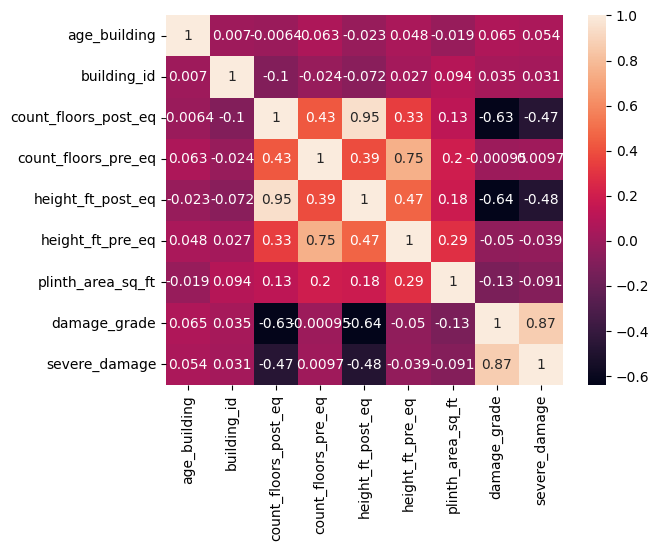

In [65]:
sns.heatmap(data=df[num_cols].corr(),annot=True)

In [64]:
?sns.heatmap

Signature:
sns.heatmap(
    data,
    *,
    vmin=None,
    vmax=None,
    cmap=None,
    center=None,
    robust=False,
    annot=None,
    fmt='.2g',
    annot_kws=None,
    linewidths=0,
    linecolor='white',
    cbar=True,
    cbar_kws=None,
    cbar_ax=None,
    square=False,
    xticklabels='auto',
    yticklabels='auto',
    mask=None,
    ax=None,
    **kwargs,
)
Docstring:
Plot rectangular data as a color-encoded matrix.

This is an Axes-level function and will draw the heatmap into the
currently-active Axes if none is provided to the ``ax`` argument.  Part of
this Axes space will be taken and used to plot a colormap, unless ``cbar``
is False or a separate Axes is provided to ``cbar_ax``.

Parameters
----------
data : rectangular dataset
    2D dataset that can be coerced into an ndarray. If a Pandas DataFrame
    is provided, the index/column information will be used to label the
    columns and rows.
vmin, vmax : floats, optional
    Values to anchor the colormap, otherwise

In [67]:
df = wrangle("C:\\Users\\User\\Downloads\\nepal_eq.db")

In [68]:
df.head()

,age_building,foundation_type,ground_floor_type,height_ft_pre_eq,land_surface_condition,other_floor_type,plan_configuration,plinth_area_sq_ft,position,roof_type,superstructure,severe_damage
b_id,,,,,,,,,,,,
3.601060e+11,4,Mud mortar-Stone/Brick,Mud,18,Flat,TImber/Bamboo-Mud,Rectangular,280,Not attached,Bamboo/Timber-Light roof,mud_mortar_stone,1
3.601060e+11,15,Mud mortar-Stone/Brick,Mud,18,Flat,Not applicable,Rectangular,120,Attached-1 side,Bamboo/Timber-Light roof,mud_mortar_stone,1
3.601070e+11,25,Mud mortar-Stone/Brick,Mud,14,Flat,TImber/Bamboo-Mud,Rectangular,300,Not attached,Bamboo/Timber-Light roof,mud_mortar_stone,1
3.601070e+11,22,Mud mortar-Stone/Brick,Mud,16,Flat,TImber/Bamboo-Mud,Rectangular,155,Not attached,Bamboo/Timber-Light roof,mud_mortar_stone,1
3.602020e+11,20,Mud mortar-Stone/Brick,Brick/Stone,14,Flat,TImber/Bamboo-Mud,Rectangular,240,Attached-1 side,Bamboo/Timber-Heavy roof,mud_mortar_stone,1


In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 78074 entries, 360106001171.0 to 366709001281.0
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   age_building            78074 non-null  int64 
 1   foundation_type         78074 non-null  object
 2   ground_floor_type       78074 non-null  object
 3   height_ft_pre_eq        78074 non-null  int64 
 4   land_surface_condition  78074 non-null  object
 5   other_floor_type        78074 non-null  object
 6   plan_configuration      78074 non-null  object
 7   plinth_area_sq_ft       78074 non-null  int64 
 8   position                78074 non-null  object
 9   roof_type               78074 non-null  object
 10  superstructure          78074 non-null  object
 11  severe_damage           78074 non-null  int64 
dtypes: int64(4), object(8)
memory usage: 7.7+ MB


In [70]:
df['foundation_type'].unique()

array(['Mud mortar-Stone/Brick', 'Cement-Stone/Brick', 'Bamboo/Timber',
       'RC', 'Other'], dtype=object)

In [72]:
df['ground_floor_type'].unique()

array(['Mud', 'Brick/Stone', 'RC', 'Timber', 'Other'], dtype=object)

In [80]:
foundation_pivot = pd.pivot_table(
    df,index = 'foundation_type', values = 'severe_damage',aggfunc='mean').sort_values(by='severe_damage')
foundation_pivot

,severe_damage
foundation_type,
RC,0.027134
Bamboo/Timber,0.321429
Cement-Stone/Brick,0.410200
Mud mortar-Stone/Brick,0.684101
Other,0.801020


In [76]:
major,minor = df.severe_damage.value_counts(normalize=True)

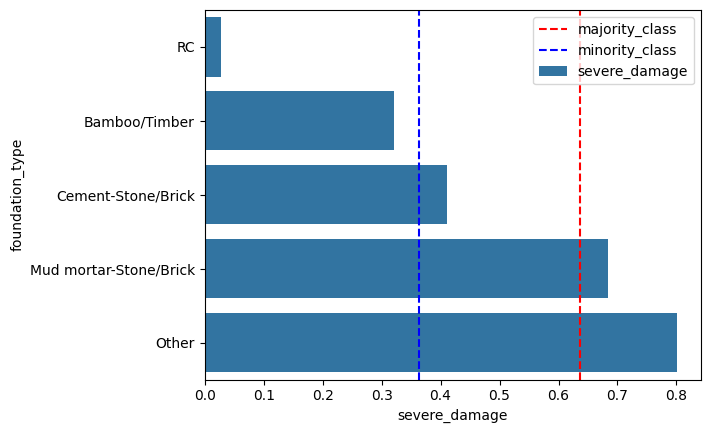

In [82]:
sns.barplot(data=foundation_pivot,x='severe_damage',y='foundation_type',label='severe_damage')
plt.axvline(
    major,linestyle='--',color='red',label='majority_class'
)
plt.axvline(
    minor,linestyle='--',color='blue',label='minority_class'
)
plt.legend(loc= 'upper right');

In [83]:
df.select_dtypes('object').nunique()

foundation_type            5
ground_floor_type          5
land_surface_condition     3
other_floor_type           4
plan_configuration        10
position                   4
roof_type                  3
superstructure            11
dtype: int64

In [87]:
target = 'severe_damage'
inputs = df.drop(target,axis=1)
X = inputs
y = df[target] 

In [88]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=30)

In [89]:
acc_baseline = y_train.value_counts(normalize=True).max()
acc_baseline

np.float64(0.636865783954274)

In [91]:
model = Pipeline(
    [
        ('oh',OneHotEncoder(use_cat_names=True)),
        ('ss',StandardScaler()),
        ('lr',LogisticRegression())
    ]
)

In [94]:
check_is_fitted(model)

In [92]:
model.fit(X_train,y_train)

Pipeline(steps=[('oh',
                 OneHotEncoder(cols=['foundation_type', 'ground_floor_type',
                                     'land_surface_condition',
                                     'other_floor_type', 'plan_configuration',
                                     'position', 'roof_type',
                                     'superstructure'],
                               use_cat_names=True)),
                ('ss', StandardScaler()), ('lr', LogisticRegression())])

In [93]:
model.score(X_train,y_train)

0.7145167229702685

In [108]:
# weight = model.named_steps['lr'].coef_
# weight = np.ravel(weight)
len(weight)

48

In [129]:
weight = np.exp(weight)

In [96]:
model.named_steps['lr'].intercept_

array([0.48273535])

In [130]:
feature_importances = pd.DataFrame(
    {
        'feature' : model.named_steps['oh'].get_feature_names_out(),
        'weights' : weight
    }
)
feature_importances = feature_importances.head(10).sort_values(by='weights',ascending=False)
feature_importances.head(10)

,feature,weights
1,foundation_type_Mud mortar-Stone/Brick,1.153823
7,ground_floor_type_Brick/Stone,1.076226
4,foundation_type_Other,1.067151
0,age_building,1.051941
9,ground_floor_type_Timber,1.042875
6,ground_floor_type_Mud,1.040116
2,foundation_type_Cement-Stone/Brick,1.021301
5,foundation_type_Bamboo/Timber,0.950939
8,ground_floor_type_RC,0.867995
3,foundation_type_RC,0.801339


<Axes: xlabel='weights', ylabel='feature'>

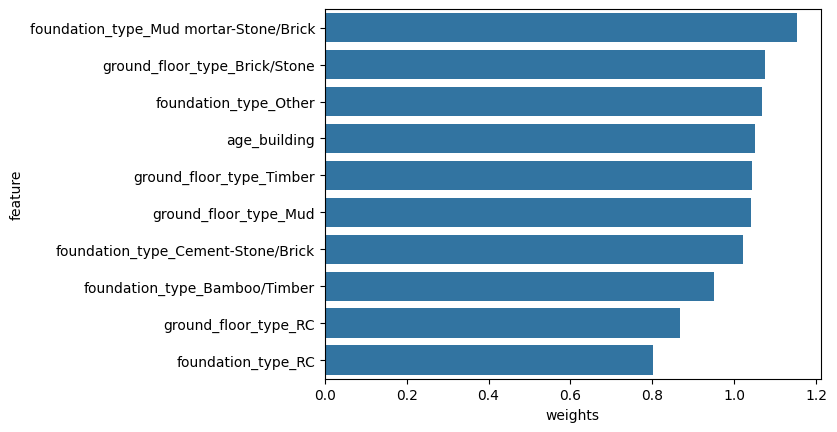

In [131]:
sns.barplot(data=feature_importances,x='weights',y='feature')